# Advent of Code 2022

In [523]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

0.0 - Functions

In [524]:
def make_hist_box(df, attrb_list):

    fig, axs =plt.subplots(len(attrb_list),2,figsize=(15,5), constrained_layout=True)
    axs = axs.flatten()
    i = 0
    for attr in attrb_list:
        data_title = df[attr].name
        #sort values for Hist
        counts, bins = np.histogram(df[attr].sort_values(), bins=10)

        #Histogram        
        axs[i].set_title(data_title)
        axs[i].set_xlabel(data_title)
        axs[i].set_ylabel("Frequency")
        axs[i].hist(x=bins[:-1], bins=bins, weights=counts, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

        #Boxplot
        axs[i+1].set_title(data_title)
        axs[i+1].boxplot(x=df[attr],vert=False)

        i += 2
    
    return

## 1.0 - Day 1

### 1.1 - Part 1

In [525]:
df1 = pd.DataFrame(columns=['Elf', 'Calories'])
i = 0
calories = 0
with open(r'./day_1/input.txt') as file:
    for line in file:
        if line.strip():
            line   = line.rstrip()
            calories += int(line)
        else:            
            elf = "Elf_" + str(i)
            df1.loc[len(df1.index)] = [elf, calories]
            calories = 0
            i += 1
    
df1

,Elf,Calories
0,Elf_0,45508
1,Elf_1,12219
2,Elf_2,38614
3,Elf_3,43704
4,Elf_4,45119
...,...,...
236,Elf_236,42386
237,Elf_237,49942
238,Elf_238,49335
239,Elf_239,51078


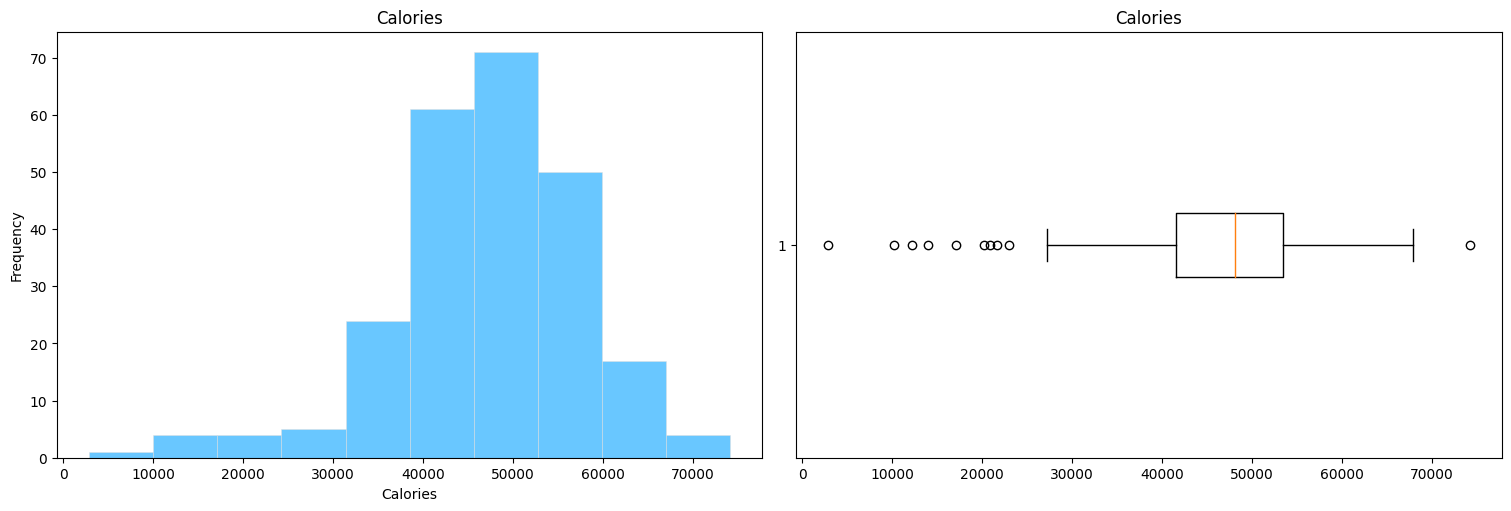

In [526]:
make_hist_box(df1, ['Calories'])


In [527]:
df1['Calories'].max()

74198

In [528]:
df1_2 = df1.sort_values(by= 'Calories', ascending= False)[:3]
df1_2['Calories'].sum()

209914

## Day 2

### Part 1

In [529]:
elf_guide = {'A':1, 'B':2, 'C':3}
you_guide = {'X': elf_guide['A'], 'Y':elf_guide['B'], 'Z':elf_guide['C'] }
conditions_1 = {'A X': 3, 'A Y': 6, 'A Z': 0, 'B X': 0, 'B Y': 3, 'B Z': 6, 'C X': 6, 'C Y': 0, 'C Z': 3 }
conditions_2 = {'X': 2, 'Y': 0, 'Z': 1} #x lose, y draw, z win
condition_3 = {'X': 0, 'Y': 3, 'Z': 6}
alphab = ['A', 'B', 'C']
df2 = pd.DataFrame(columns=['input', 'score_1', 'score_2'])

score_1 = 0
score_2 = 0
with open(r'./day_2/input.txt') as file:
    for count, line in enumerate(file):
        line = line.rstrip()
        score_1 = conditions_1[line] + you_guide[line[2]]
        val_1 = ((conditions_2[line[2]] + elf_guide[line[0]]) %3)-1
        return_hand = alphab[val_1] 
        score_2 = condition_3[line[2]] + elf_guide[return_hand]
        df2.loc[count] = [line, score_1, score_2]
df2

,input,score_1,score_2
0,B Y,5,5
1,A Z,3,8
2,A Z,3,8
3,C Z,6,7
4,B Y,5,5
...,...,...,...
2495,A Z,3,8
2496,B X,1,1
2497,B Z,9,9
2498,B Y,5,5


In [530]:
df2['score_1'].sum()

11603

In [531]:
df2['score_2'].sum()

12725

##Day 3
### Part 1

In [532]:


df3 = pd.DataFrame(columns=['item', 'prority', 'score'])
with open(r'./day_3/input.txt') as file:
    for count, line in enumerate(file):
        line = line.rstrip()
        str_length = int(len(line)/2)
        #print(str_length)
        alpha_set_1 = set(line[:str_length])
        alpha_set_2 = set(line[str_length:])
        for chara in alpha_set_1:
            if chara in alpha_set_2:
                if chara.isupper():
                    chara_score = ord(chara)-38
                else:
                    chara_score = ord(chara)-96
                df3.loc[count]=[line, chara, chara_score]

df3
        
        
        

,item,prority,score
0,MVWpzTTrTFNNLtssjV,V,48
1,hRJncnJCnhPCnBSbCQRhhQRPFHmsbHLzbLNHsjNNFmGGGsGF,b,2
2,lSBQJBBBBcnccnQvBnPQznfrgwlrTZfDwTfWqrrpgMpw,l,12
3,sRPgrzSgrSbfTrgspBPsDWWTmdnvdZWZwTmwvdmd,T,46
4,tVGpCGqCGjlHcNGVNHZDmnZMWdWMWCdZDvnZ,C,29
...,...,...,...
295,tZHHSRmNHcgmNzpDPJtttqjLqdpL,t,20
296,HbNbZmcHQJbsFWvs,b,2
297,VgPNWGbgSjGjfhRRFfzThtmtzF,f,6
298,qLCQJBqqcPPmLHhHFz,L,38


In [533]:
df3['score'].sum()

7701

### Part 2

In [534]:
df3['item'].size

300

In [535]:
df3_2 = pd.DataFrame(columns=['group', 'score'])
j = 0
i = 0
for k in range(int(len(df3)/3)):
    elf_1 = set(df3.iloc[i, 0])
    elf_2 = set(df3.iloc[i+1, 0])
    elf_3 = set(df3.iloc[i+2, 0])
    for chara in elf_1:
        if chara in elf_2 and chara in elf_3:
            if chara.isupper():
                chara_score = ord(chara)-38
            else:
                chara_score = ord(chara)-96
            df3_2.loc[j] = [chara, chara_score]
    i += 3
    j += 1
df3_2



,group,score
0,z,26
1,p,16
2,F,32
3,s,19
4,r,18
...,...,...
95,R,44
96,z,26
97,L,38
98,J,36


In [536]:
df3_2['score'].sum()

2644

## Day 3
### Part 1

In [537]:
overlap_counter = 0
cross_counter = 0
with open(r'./day_4/input.txt') as file:
    for count, line in enumerate(file):
        line = line.rstrip()
        line = line.split(',')
        elf_1 = line[0].split('-')
        elf_2 = line[1].split('-')
        if (int(elf_1[0]) >= int(elf_2[0])) & (int(elf_1[1]) <= int(elf_2[1])):
            overlap_counter += 1
        elif (int(elf_2[0]) >= int(elf_1[0])) & (int(elf_2[1]) <= int(elf_1[1])):
            overlap_counter += 1
        if (int(elf_2[0]) <= int(elf_1[0]) <= int(elf_2[1])) | (int(elf_2[0]) <= int(elf_1[1]) <= int(elf_2[1])) | (int(elf_1[0]) <= int(elf_2[0]) <= int(elf_1[1])) | (int(elf_1[0]) <= int(elf_2[1]) <= int(elf_1[1])):
            cross_counter += 1
print(f'{overlap_counter}\n{cross_counter}')

576
905


## Day 5
### Part 1

In [538]:
d5_list = []
crates = [[] for x in range(9)]
crates_2 = [[] for x in range(9)]
with open(r'./day_5/input.txt') as file:
    for count, line in enumerate(file):
        d5_list.append(line)

i = 0
while d5_list[i][1] != '1':
    k=1
    for j in range(9):
        if d5_list[i][k] != "":
            crates[j].append(d5_list[i][k])
        k += 4
    i+=1
print(f'{crates}\n')
i = 0
for element in crates:
    for value in element:
        crates_2[i].append(value)
    i += 1
for element in crates:
    while ' ' in element:
        element.remove(' ')
for element in crates_2:
    while ' ' in element:
        element.remove(' ')
print(f'{crates}\n')

for element in d5_list:
    if element[0][0] == 'm':
        element = element.rstrip()
        action = element.split(' ')
        holder = []
        for i in range(int(action[1])):
            crates[int(action[-1])-1].insert(0,crates[int(action[3])-1].pop(0))
            holder.insert(0,crates_2[int(action[3])-1].pop(0))
        while len(holder) != 0:
            crates_2[int(action[-1])-1].insert(0,holder.pop(0))
        # part 2

print(f'{crates}\n{crates_2}\n')
top_box_2 = ''
top_box = ''
for box in crates:
    top_box += box[0]
for box in crates_2:
    top_box_2 += box[0]
print(f'part 1: {top_box}\npart 2: {top_box_2}')

[[' ', 'Z', 'V', 'T', 'B', 'J', 'G', 'R'], [' ', ' ', ' ', ' ', 'L', 'V', 'R', 'J'], [' ', ' ', ' ', ' ', ' ', 'F', 'Q', 'S'], ['G', 'Q', 'V', 'F', 'L', 'N', 'H', 'Z'], ['W', 'M', 'S', 'C', 'J', 'T', 'Q', 'R'], [' ', ' ', 'F', 'H', 'C', 'T', 'W', 'S'], [' ', 'J', 'N', 'F', 'V', 'C', 'Z', 'D'], ['Q', 'F', 'R', 'W', 'D', 'Z', 'G', 'L'], [' ', ' ', ' ', 'P', 'V', 'W', 'B', 'J']]

[['Z', 'V', 'T', 'B', 'J', 'G', 'R'], ['L', 'V', 'R', 'J'], ['F', 'Q', 'S'], ['G', 'Q', 'V', 'F', 'L', 'N', 'H', 'Z'], ['W', 'M', 'S', 'C', 'J', 'T', 'Q', 'R'], ['F', 'H', 'C', 'T', 'W', 'S'], ['J', 'N', 'F', 'V', 'C', 'Z', 'D'], ['Q', 'F', 'R', 'W', 'D', 'Z', 'G', 'L'], ['P', 'V', 'W', 'B', 'J']]

[['Z', 'H', 'J', 'G', 'C', 'H', 'J', 'V', 'F', 'F', 'W', 'N', 'M', 'S', 'R', 'Z', 'V', 'D', 'Z', 'R', 'J'], ['S', 'T', 'Q', 'T'], ['Q', 'N', 'G', 'J', 'R', 'F', 'V', 'B', 'D', 'Z', 'Q', 'F', 'V', 'W', 'W'], ['V'], ['C'], ['C'], ['J', 'S', 'R'], ['L', 'B', 'T', 'F'], ['L', 'L', 'G', 'P', 'W', 'Q']]
[['Q', 'V', 'W', 'Z',

## Day 6
### Part 1

In [539]:
with open(r'./day_6/input.txt') as file:
    for count, line in enumerate(file):
        line = line.rstrip()
        i = 0
        j = 4
        k = 14
        check_set_1 = set(line[:j])
        check_set_2 = set(line[:k])
        while len(check_set_1) != 4:
            i += 1
            j += 1
            check_list_1 = line[j-4:j]
            check_set_1 = set(check_list_1)
        while len(check_set_2) != 14:
            k += 1
            check_list_2 = line[k-14:k]
            check_set_2 = set(check_list_2)
            



In [540]:
print(f'Part 1: {j}\nPart 2: {k}')

Part 1: 1658
Part 2: 2260


## Day 7

### Part 1

In [541]:
#import sys
#sys.setrecursionlimit(50000)

class Node(object):
    def __init__(self, data, size= 0):
        self.data = data
        self.size = size
        self.parent = None
        self.children = []

    def add_child(self, obj):
        self.children.append(obj)
        obj.parent = self


    def __repr__(self):
        if self.children:
            print_data = "Node " + repr(self.data) + " " + repr(self.size) + " ↴" + "\n"
            indent = "    "
            for child in self.children:
              for line in repr(child).splitlines():
                print_data += indent + line + "\n"
            return print_data
        else:
            return "Node " + repr(self.data) + " Size " + repr(self.size)

def set_sizes(node):

    if node.children:
        for child in node.children:
            node.size += set_sizes(child)
        return node.size
    else:
        return node.size

def d7_part1(node, size_sum):
    if node.children:
        for child in node.children:
            if child.children:
                size_sum = d7_part1(child, size_sum)
            else:
                pass
        if node.size <= 100000:
            size_sum += node.size
        return size_sum
    else:
        return 0 


def d7_part2(node, minimum_limit, current_minmum):
    if node.children:
        for child in node.children:
            if child.children:
                current_minmum = d7_part2(child, minimum_limit, current_minmum)
            else:
                pass
        if node.size >= minimum_limit and node.size < current_minmum:
            current_minmum = node.size
        return current_minmum
    else:
        return current_minmum

In [542]:
directory = []
with open(r'./day_7/input.txt') as file:
    for count, line in enumerate(file):
        directory.append(line.rstrip().split(' '))



root = Node(directory[0][2])
current_node = root
max_val = 0
for element in directory:
    # dir
    if element[0] == 'dir':
        hold_list = []
        # check if directory already in child list
        for child in current_node.children:
            hold_val = child.data
            hold_list.append(hold_val)
        # if not in the child list add it
        if element[1] not in hold_list:
            current_node.add_child(Node(element[1]))
    # action
    elif element[0] == '$': 
        # if cd
        if element[1] == 'cd':
            # set current node to parent
            if element[2] == '..':
                current_node = current_node.parent
            # if  root pass
            elif element[2] == '/':
                pass
            # else
            else:
                # change current node to child in child list
                for child in current_node.children:
                    if child.data == element[2]:
                        current_node = child
        # is ls then pass
        else:
            pass
    # reached file, set child as leaf node with data as name and size as size
    else:
        current_node.add_child(Node(element[1],int(element[0])))

# set sizes to all directories
set_sizes(root)
day_7_part_1 = d7_part1(root, max_val)
free_space = 70000000 - root.size
minimum_limit =  30000000 -free_space 
print(f'free space: {free_space} min limit: {minimum_limit}')
day_7_part_2 = d7_part2(root, minimum_limit, free_space)

free space: 25195167 min limit: 4804833


In [543]:
print(f'Part 1: {day_7_part_1}\nPart 2: {day_7_part_2}')

Part 1: 1297683
Part 2: 5756764
